In [1]:
%matplotlib inline

import cv2
import display
import os

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [47]:
#visualize csv
class Visualizer:
    def __init__(self, path, screen_vid_path = None, scr_w=None, scr_h=None):
        self.scr_w = scr_w
        self.scr_h = scr_h
        
        self.vid_path = path
        self.cap = cv2.VideoCapture(path)
        self.cap_fps = float(self.cap.get(cv2.CAP_PROP_FPS))
        print(self.cap_fps)
        
        self.screen_vid_path = screen_vid_path
        if not self.screen_vid_path is None:
            self.scr_cap = cv2.VideoCapture(screen_vid_path)
            self.scr_cap_fps = float(self.scr_cap.get(cv2.CAP_PROP_FPS))
            print(self.scr_cap_fps)
        else:
            self.scr_cap = None
        
        self.csv_path = self.vid_path + ".csv"
        if not os.path.isfile(self.csv_path):
            raise Exception("no csv file")
        self.points = []
        with open(self.csv_path) as f:
            lines = f.readlines()
            lines = lines[9:]
            for line in lines:
                spl = line.split(',')
                self.points.append([int(spl[0]), [float(spl[1]), float(spl[2])]])
        print(len(self.points), 'points readed')
    
    def _plot(self, points, show_vid = False):
        x = [p[1][0] for p in points]
        y = [p[1][1] for p in points]
        colors = [float(p[0]) / self.points[-1][0] for p in points]
        plt.rcParams["figure.figsize"] = [16,9]
        plt.scatter(x, y, c=colors, alpha=0.3, cmap='viridis', zorder=1)
        plt.colorbar()
        
        if (not self.scr_cap is None) and show_vid:
            self.scr_cap.set(cv2.CAP_PROP_POS_FRAMES, self.vid_seconds * self.scr_cap_fps)
            _, scr_frame = self.scr_cap.read()
            scr_frame = cv2.resize(scr_frame, dsize=(self.scr_w, self.scr_h))
            
            self.cap.set(cv2.CAP_PROP_POS_FRAMES, self.vid_seconds * self.cap_fps)
            _, cap_frame = self.cap.read()
            cap_frame = cv2.resize(cap_frame, dsize=(self.scr_w, self.scr_h))
            
            mat = np.concatenate([scr_frame, cap_frame], axis=1)
            mat = cv2.cvtColor(mat, cv2.COLOR_BGR2RGB)
            
            plt.imshow(mat, zorder=0)
        
    def plot_all(self):
        self._plot(self.points)
        self.xmin, self.xmax, self.ymin, self.ymax = plt.axis()
        
    def plot_interactive(self, xmin=None, xmax=None, ymin=None, ymax=None):
        if xmin is None: xmin = self.xmin
        if xmax is None: xmax = self.xmax
        if ymin is None: ymin = self.ymin
        if ymax is None: ymax = self.ymax
        @interact
        def show(i = (0, self.points[-1][0], 30), w = (30, self.points[-1][0], 10)):
            points = list(filter(lambda x : x[0] > i - w/2 and x[0] < i + w/2, self.points))
            self.vid_seconds = i / self.cap_fps
            self._plot(points, show_vid = True)
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

29.94764397905759
1145 points readed


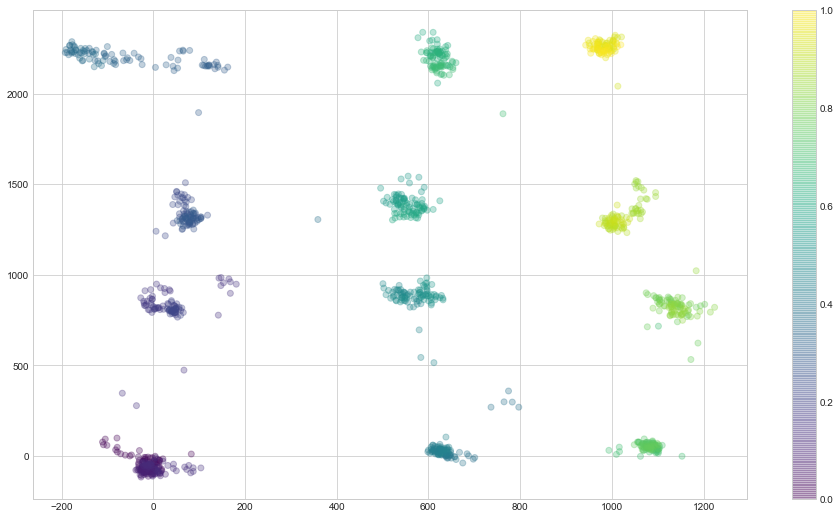

interactive(children=(IntSlider(value=570, description='i', max=1144, step=30), IntSlider(value=580, descripti…

In [48]:
calib_vid_path = "calib_run_example/NEURALACTION_20200227_13_29_04.mp4"
visualizer = Visualizer(calib_vid_path)
visualizer.plot_all()
visualizer.plot_interactive()

30.049766249434473
2914 points readed


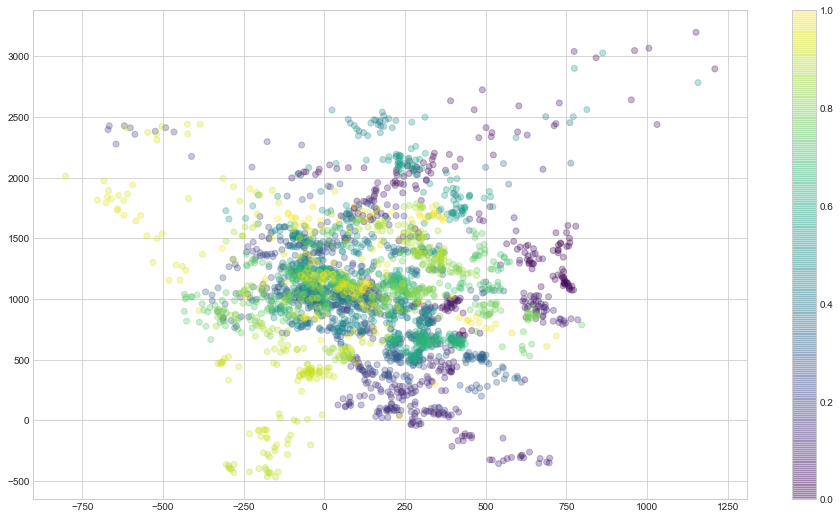

interactive(children=(IntSlider(value=1440, description='i', max=2928, step=30), IntSlider(value=1470, descrip…

In [49]:
test_vid_path = "calib_run_example/QVR_2020_02_27_13_25_46.mp4"
visualizer = Visualizer(test_vid_path)
visualizer.plot_all()
visualizer.plot_interactive()

29.87724217434462
39.12690089955282
36877 points readed


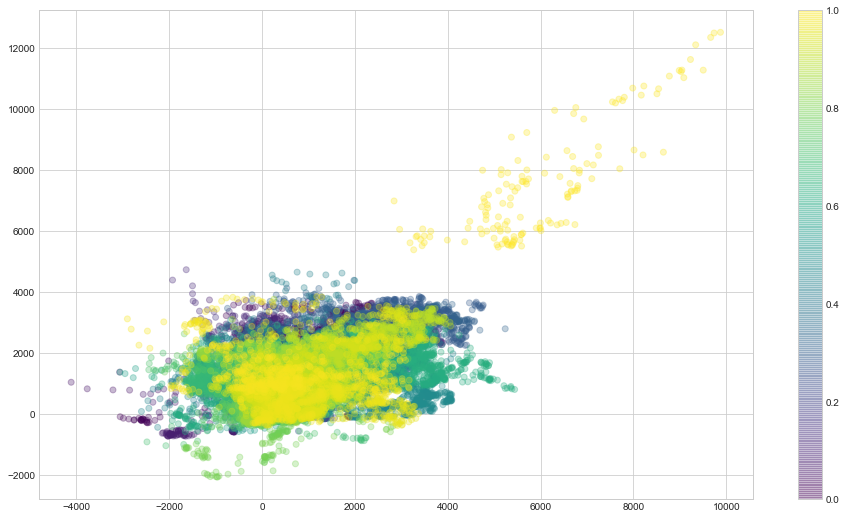

interactive(children=(IntSlider(value=18780, description='i', max=37584, step=30), IntSlider(value=18800, desc…

In [51]:
test_vid_path = r"F:\Downloads\0530 Part E\QVR_2020_06_02_14_11_34.mp4"
visualizer = Visualizer(test_vid_path, screen_vid_path = r"F:\Downloads\0530 Part E\20200602_141156.mp4", scr_w = 1440, scr_h=2768)
visualizer.plot_all()
visualizer.plot_interactive(xmin = -1000, xmax = 4000, ymin = 3500, ymax=-500)